# Machine Learning Model Comparison

This notebook will work on a mushroom data set to view how different machine
learning models perform with categorical data.

Data set availible from https://archive.ics.uci.edu/ml/datasets/Mushroom

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout


2021-11-03 18:15:41.827421: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## Column Information

| class| cap-shape | cap-surface | cap-color | bruises? | odor | gill-attachment | gill-spacing | gill-size | gill-color | stalk-shape | stalk-root | stalk-surface-above-ring | stalk-surface-below-ring |stalk-color-above-ring | stalk-color-below-ring | veil-type | veil-color | ring-number | ring_type | spore-rint-color | population | habitat |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| edible=e |bell=b |fibrous=f |brown=n |bruises=t |almond=a |attached=a |close=c |broad=b |black=k |enlarging=e |bulbous=b |fibrous=f |fibrous=f |brown=n |brown=n |partial=p |brown=n |none=n |cobwebby=c |black=k |abundant=a |grasses=g |
| poisonous=p |conical=c |grooves=g |buff=b |no=f |anise=l |descending=d |crowded=w |narrow=n |brown=n |tapering=t |club=c |scaly=y |scaly=y |buff=b |buff=b |universal=u |orange=o |one=o |evanescent=e |brown=n |clustered=c |leaves=l |
|   |convex=x |scaly=y |cinnamon=c |  |creosote=c |free=f |distant=d |  |buff=b |  |cup=u |silky=k |silky=k |cinnamon=c |cinnamon=c |  |white=w |two=t |flaring=f |buff=b |numerous=n |meadows=m |
|   |flat=f |smooth=s |gray=g |  |fishy=y |notched=n |  |  |chocolate=h |  |equal=e |smooth=s |smooth=s |gray=g |gray=g |  |yellow=y |  |large=l |chocolate=h |scattered=s |paths=p |
|   |knobbed=k |  |green=r |  |foul=f |  |  |  |gray=g |  |rhizomorphs=z |  |  |orange=o |orange=o |  |  |  |none=n |green=r |several=v |urban=u |
|   |sunken=s |  |pink=p |  |musty=m |  |  |  |green=r |  |rooted=r |  |  |pink=p |pink=p |  |  |  |pendant=p |orange=o |solitary=y |waste=w |
|   |  |  |purple=u |  |none=n |  |  |  |orange=o |  |missing=? |  |  |red=e |red=e |  |  |  |sheathing=s |purple=u |  |woods=d |
|   |  |  |red=e |  |pungent=p |  |  |  |pink=p |  |  |  |  |white=w |white=w |  |  |  |zone=z |white=w |  |  |
|   |  |  |white=w |  |spicy=s |  |  |  |purple=u |  |  |  |  |yellow=y |yellow=y |  |  |  |  |yellow=y |  |  |
|   |  |  |yellow=y |  |  |  |  |  |red=e |  |  |  |  |  |  |  |  |  |  |  |  |  |
|   |  |  |  |  |  |  |  |  |white=w |  |  |  |  |  |  |  |  |  |  |  |  |  |
|   |  |  |  |  |  |  |  |  |yellow=y |  |  |  |  |  |  |  |  |  |  |  |  |  |

## Loads mushroom dataset and names columns

In [2]:
column_names = [
        'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?',
        'oder', 'gill-attatchment', 'gill-spacing', 'gill-size',
        'gill-color', 'stalk-shape', 'stalk-root',
        'stalk-surface-above-ring', 'stalk-surface-below-ring',
        'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
        'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
        'population', 'habitat']
df = pd.read_csv('data/agaricus-lepiota.data', names=column_names)


## Splits train and test set

In [3]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## Encode categorical data
Use OneHotEncoder for X and use LabelEncoder for y

In [4]:
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_encoded = ohe.transform(X_train)
X_test_encoded = ohe.transform(X_test)
le = LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)


## Create a nueral network model

In [5]:
lr = 2e-3
model = Sequential([
    Dense(10, input_dim=X_train_encoded.shape[1]),
    LeakyReLU(alpha=lr),
    Dropout(0.2),
    Dense(10),
    LeakyReLU(alpha=lr),
    Dense(10),
    LeakyReLU(alpha=lr),
    Dense(1, activation='sigmoid')
    ])
model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])


2021-11-03 18:15:42.524765: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-03 18:15:42.525283: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-03 18:15:42.630900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-03 18:15:42.631339: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:27:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.68GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2021-11-03 18:15:42.631414: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-03 18:15:42.632354: I tensorflow/stream_executor/platform/def

## Train neural network model

Epoch 1/5
  1/204 [..............................] - ETA: 1:31 - loss: 0.8026 - accuracy: 0.4688

2021-11-03 18:15:43.318354: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-03 18:15:43.320422: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600015000 Hz
2021-11-03 18:15:43.371245: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


204/204 [==============================] - 1s 3ms/step - loss: 0.5557 - accuracy: 0.6967 - val_loss: 0.0664 - val_accuracy: 0.9877
Epoch 2/5
204/204 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9736 - val_loss: 0.0119 - val_accuracy: 0.9963
Epoch 3/5
204/204 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9933 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 4/5
204/204 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9950 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 5/5
51/51 [==============================] - 0s 910us/step - loss: 8.1131e-04 - accuracy: 1.0000
Model Test Accuracy:  1.0


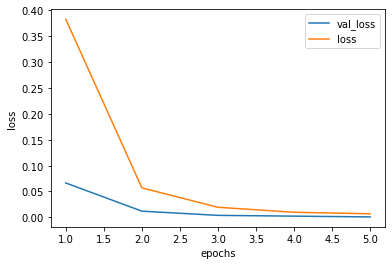

In [6]:
epochs = 5
history = model.fit(
        X_train_encoded,
        y_train_encoded,
        epochs=epochs,
        validation_data=(X_test_encoded, y_test_encoded))
fig, ax = plt.subplots()
ax.plot(range(1, epochs+1), history.history['val_loss'], label='val_loss')
ax.plot(range(1, epochs+1), history.history['loss'], label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.savefig('images/loss.png')
loss, acc = model.evaluate(X_test_encoded, y_test_encoded)
print('Model Test Accuracy: ', acc)
